Numpy基础：数组和矢量计算
Numpy是高性能科学计算和数学分析的基础包，是大多数高级工具的构建基础。提出以下功能：

- ndarray，一个具有矢量算术运算和复杂广播能力的快速且节省空间的多维数组
- 对数组数据进行快速运算的标准数学函数（无需编写循环）
- 读写磁盘数据的工具
- 线性代数、随机数生成以及傅里叶变换
- 集成由C、C++、Fortran等语言编写代码的工具

标准的NumPy约定导入方法：

In [1]:
import numpy as np

# NumPy的ndarray：一种多维数组对象

NumPy最重要的特点是其**N维数组对象（即ndarray）**，能够对整块数据执行一些数学运算，其语法与基本数据类型之间的运算一样。

In [2]:
data = np.random.random((2,3))
data

array([[0.3778785 , 0.8355624 , 0.15841684],
       [0.44855632, 0.2491945 , 0.29059618]])

In [3]:
data * 10

array([[3.77878502, 8.35562405, 1.58416839],
       [4.48556324, 2.49194499, 2.90596177]])

In [4]:
data + data

array([[0.755757  , 1.67112481, 0.31683368],
       [0.89711265, 0.498389  , 0.58119235]])

1. ndarray是一个通用的**同构数据容器**，即其中的元素必须是相同类型的。
2. 每个数组都有一个shape（一个表示各维度大小的元组)和一个dtype（说明数组数据类型的对象）

In [5]:
data.shape

(2, 3)

In [6]:
data.dtype

dtype('float64')

## 创建ndarray对象

### `np.array`函数

+ 最简单的办法是使用**array**函数，它接受一切**序列型对象**（字符串、列表、元组等，包括其他数组）

In [7]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [8]:
data1

[6, 7.5, 8, 0, 1]

嵌套序列（比如等长的列表）将会被转化为一个多维数组

In [9]:
data2 = [[1,2,3,4],[5,6,7,8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [10]:
arr2.ndim

2

In [11]:
arr2.shape

(2, 4)

In [207]:
arr2.dtype

dtype('int32')

除非显示说明，np.array会尝试为新建的数组推断出一个较为合适的数据类型，保存在dtype对象中。

In [13]:
arr1.dtype

dtype('float64')

In [14]:
arr2.dtype

dtype('int32')

+ zeros和ones分别可以创建指定长度或形状的全部为0或1的数组。empty可以创建一个没有任何具体数值的数组。创建多为数组只需传入一个表示形状的元组即刻。

In [5]:
import numpy as np
np.zeros((10,))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [11]:
arrr = np.zeros(10)
arrr

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
arrr.shape

(10,)

In [17]:
np.zeros((3,2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [18]:
np.zeros((3,6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [19]:
np.ones((3,2))

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [9]:
np.empty((2, 3, 2))

array([[[1.49166815e-154, 1.49166815e-154],
        [4.44659081e-323, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000]],

       [[0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000]]])

*np.empty并会总是返回全0数组，多数情况下，他返回的都是一些未初始化的垃圾值。*

+ `arange`函数（Python内置函数range的NumPy版）

In [21]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [22]:
np.arange(0,15,2)

array([ 0,  2,  4,  6,  8, 10, 12, 14])

### ndarray的数据类型

In [23]:
arr3 = np.array([1, 2, 3], dtype = np.float)
arr4 = np.array([1, 2, 3], dtype = np.int32)

In [24]:
arr3.dtype

dtype('float64')

In [25]:
arr4.dtype

dtype('int32')

+ 可以通过ndarray的**astype**方法显式转换其dtype：

In [26]:
arr5 = np.array([1, 2, 3, 4, 5])
arr5.dtype

dtype('int32')

In [27]:
float_arr = arr5.astype(np.float)
float_arr.dtype

dtype('float64')

如果浮点数转换为整数，则小数部分会被截断。

In [28]:
arr6 = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr6

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [29]:
arr6.dtype

dtype('float64')

In [208]:
arr6.astype(np.int)

array([ 3, -1, -2,  0, 12, 10])

In [209]:
arr6

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

如果某字符串全是数字，也可以用astype将其转换为数值形式：

In [31]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)

In [32]:
newarr = numeric_strings.astype(np.float)
newarr

array([ 1.25, -9.6 , 42.  ])

In [33]:
numeric_strings

array([b'1.25', b'-9.6', b'42'], dtype='|S4')

In [34]:
newarr.dtype

dtype('float64')

+ **数组类型转化时，会返回新建数组，即原数组的一个copy，原数组并未发生改变。**
+ 如果转化过程失败，会引发TypeError
+ 转换过程中可以不具体指定位数，譬如`np.int`，`np.float`等，NumPy会自动完成映射

In [35]:
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array = np.arange(10)

+ dtype可以用于指定新数组与已有数组同数据类型

In [36]:
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

## 基本的索引和切片
一维数组很简单，从表面上看，跟Python列表差不多。

In [37]:
arr8 = np.arange(10)
arr8

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [38]:
arr8[5]

5

In [39]:
arr8[5:8]

array([5, 6, 7])

+ 将一个标量值赋值给一个片段时，该值会自动传播（广播）到整个选区。

In [40]:
arr8[5:8] = 12
arr8

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

+ 跟列表的重要区别在于，**数组切片是原始数组的视图，即数据不会被复制，视图上的任何修改都会直接反映到源数据上**

In [41]:
arr8_slcie = arr8[5:8]
arr8_slcie[1] = 12345
arr8

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [42]:
arr8_slcie[:] = 64
arr8

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [43]:
ls = list(range(10))
ls_slice = ls[5:8]
ls_slice[1] = 12
ls

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [44]:
ls_slice

[5, 12, 7]

In [210]:
ls[5:8] = 12

TypeError: can only assign an iterable

+ 如果需要得到ndarray切片的一份副本而非视图，则需进行显式地复制操作，例如`arr8[5:8].copy()`
+ 在二维数组中,各索引位置上的元素不是标量，而是一维数组

In [3]:
arr2d = np.array([[1,2,3],[4,5,6],[7,8,9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [47]:
arr2d[2]

array([7, 8, 9])

In [48]:
arr2d[0][2]

3

In [49]:
arr2d[0,2]

3

+ 多维数组中，如果省略后面地索引，则返回对象是一个维度低一级地ndarray

In [50]:
arr3d = np.array([[[1,2, 3],[4,5,6]],[[7,8,9],[10,11,12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [51]:
arr3d.shape

(2, 2, 3)

In [52]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

+ 标量值和数组都可以赋值给`arr3d[0]`

In [53]:
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [54]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [55]:
arr3d[1, 0]

array([7, 8, 9])

### 切片索引
+ ndarray地切片语法跟Python列表这样的一维对象差不多
+ 高维度对象花样更多，可以在一个或多个轴上进行切片，也可以跟整数索引混合使用。

In [56]:
arr8 = np.arange(10)
arr8[1:6]

array([1, 2, 3, 4, 5])

In [215]:
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

In [213]:
arr2d[2,1]

8

In [216]:
arr2d[:2]

array([[1, 0, 0],
       [4, 0, 0]])

可以看出，上述例子是沿着第0轴（即第一个轴）进行切片地。也就是说，切片是沿着一个轴向选取元素，因此可以一次传入多个切片，就像传入多个索引那样。

In [59]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [63]:
arr2d[:2,1:]

array([[2, 3],
       [5, 6]])

切片操作时，只能得到相同维数的数组视图。通过将整数索引和切片索引混合，可以得到低维度的切片。

In [64]:
arr2d[1,:2]

array([4, 5])

In [65]:
arr2d[2,:1]

array([7])

In [4]:
arr2d[2:,:1]

array([[7]])

In [66]:
arr2d[2,0]

7

+ 只有冒号表示选取整个轴
+ 对切片进行赋值也会被扩散到整个选区

In [67]:
arr2d[:,0]

array([1, 4, 7])

In [68]:
arr2d[:2,1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### 布尔型索引

In [69]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)

In [70]:
cl = np.array(['A','B','A','C'])

In [71]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [72]:
data

array([[-0.93941531,  0.61932183, -0.47612125, -1.75375418],
       [-0.79295495,  0.19950757,  0.19753582,  0.79808339],
       [-0.50717375,  0.3139815 ,  0.35498004, -0.06456759],
       [-0.81620416,  0.03566906, -1.05170143, -0.73606861],
       [-1.93585196, -2.2833178 ,  0.48225951, -0.75728309],
       [-0.86040659, -1.32514244,  0.71772895,  1.6087968 ],
       [ 0.40270114,  1.41075037,  0.12274627, -0.43081914]])

假设每个名字对应data数组中的一行，如何选出对应"Bob"的所有行？**跟算术运算一样，数组的比较运算（如==）也是矢量化的。**

In [73]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

+ 布尔型数组可以用于索引, 但布尔型数组的长度必须与被索引的轴长度一致。
+ 此外，还可以将布尔型数组跟切片、整数（或整数序列）混合使用

In [74]:
data[names=='Bob']

array([[-0.93941531,  0.61932183, -0.47612125, -1.75375418],
       [-0.81620416,  0.03566906, -1.05170143, -0.73606861]])

In [75]:
data[:,cl=='A']

array([[-0.93941531, -0.47612125],
       [-0.79295495,  0.19753582],
       [-0.50717375,  0.35498004],
       [-0.81620416, -1.05170143],
       [-1.93585196,  0.48225951],
       [-0.86040659,  0.71772895],
       [ 0.40270114,  0.12274627]])

In [76]:
data[names=='Joe', 2:]

array([[ 0.19753582,  0.79808339],
       [ 0.71772895,  1.6087968 ],
       [ 0.12274627, -0.43081914]])

In [77]:
data[names=='Will', 3]

array([-0.06456759, -0.75728309])

要选取除Bob以外的其他值，**既可以使用不等于符号（!=），也可以通过波浪号（~）(以前版本是减号（-））对条件进行否定。**

In [78]:
data[names != 'Bob']

array([[-0.79295495,  0.19950757,  0.19753582,  0.79808339],
       [-0.50717375,  0.3139815 ,  0.35498004, -0.06456759],
       [-1.93585196, -2.2833178 ,  0.48225951, -0.75728309],
       [-0.86040659, -1.32514244,  0.71772895,  1.6087968 ],
       [ 0.40270114,  1.41075037,  0.12274627, -0.43081914]])

In [79]:
data[~(names == 'Bob')]

array([[-0.79295495,  0.19950757,  0.19753582,  0.79808339],
       [-0.50717375,  0.3139815 ,  0.35498004, -0.06456759],
       [-1.93585196, -2.2833178 ,  0.48225951, -0.75728309],
       [-0.86040659, -1.32514244,  0.71772895,  1.6087968 ],
       [ 0.40270114,  1.41075037,  0.12274627, -0.43081914]])

选取三个名字中的两个则需要组合应用多个布尔条件，使用 **&（和）、|（或）之类的布尔算术运算符**。Python关键词and 和 or 在布尔型数组中无效。

In [80]:
mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False])

In [81]:
data[mask]

array([[-0.93941531,  0.61932183, -0.47612125, -1.75375418],
       [-0.50717375,  0.3139815 ,  0.35498004, -0.06456759],
       [-0.81620416,  0.03566906, -1.05170143, -0.73606861],
       [-1.93585196, -2.2833178 ,  0.48225951, -0.75728309]])

+ 布尔型索引选取数组中的数据，总是创建数据的副本，即使返回一摸一样的数组。
+ 可以通过布尔型数组设置值。譬如，将data中所有的负值设置为0：

In [82]:
data[data < 0] = 0
data

array([[0.        , 0.61932183, 0.        , 0.        ],
       [0.        , 0.19950757, 0.19753582, 0.79808339],
       [0.        , 0.3139815 , 0.35498004, 0.        ],
       [0.        , 0.03566906, 0.        , 0.        ],
       [0.        , 0.        , 0.48225951, 0.        ],
       [0.        , 0.        , 0.71772895, 1.6087968 ],
       [0.40270114, 1.41075037, 0.12274627, 0.        ]])

In [83]:
data[names != 'Joe'] = 7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.19950757, 0.19753582, 0.79808339],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.        , 0.71772895, 1.6087968 ],
       [0.40270114, 1.41075037, 0.12274627, 0.        ]])

### 花式索引（Fancy indexing）
NumPy术语，指利用整数数组进行索引。

In [84]:
arr9 = np.empty((8, 4))
for i in range(8):
    arr9[i] = i

In [85]:
arr9

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

+ 为了以特定顺序选取子集，只需传入一个用于指定顺序的整数列或ndarray即可
+ 使用负数将会从末尾开始选取行

In [86]:
arr9[1]

array([1., 1., 1., 1.])

In [87]:
arr9[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [88]:
arr9[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [89]:
arr9[:,[2,1,0]]

array([[0., 0., 0.],
       [1., 1., 1.],
       [2., 2., 2.],
       [3., 3., 3.],
       [4., 4., 4.],
       [5., 5., 5.],
       [6., 6., 6.],
       [7., 7., 7.]])

+ 一次传入**多个索引数组，将会返回一个一维数组**，其中的元素对应各个索引元组

In [5]:
arr10 = np.arange(32).reshape((8, 4))
arr10

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [6]:
arr10[[1,5,7,2],[0, 3,1,2]]

array([ 4, 23, 29, 10])

In [7]:
arr10[[1,5,7,2]]

array([[ 4,  5,  6,  7],
       [20, 21, 22, 23],
       [28, 29, 30, 31],
       [ 8,  9, 10, 11]])

In [8]:
arr10[[1,5,7,2]][[0, 3,1,2]]

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [20, 21, 22, 23],
       [28, 29, 30, 31]])

In [218]:
arr10[[1,5,7,2]][:,[0,3,1,2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [93]:
arr10[np.ix_([1,5,7,2],[0,3,1,2])]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

- **花式索引与切片不一样，总是将数据复制到新的数组中。**

##  数组转置和轴对换
+ 转置(transpose)，是重塑的一种特殊形式，返回的是源数据的视图（不会进行任何复制操作）。
+ 此外，还有T属性,在进行矩阵计算时经常用到，譬如利用`np.dot`计算矩阵内积$X^TX$。

In [94]:
arr14 = np.arange(12).reshape((3,4))
arr14

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [95]:
arr14.transpose()

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

In [96]:
arr13 = np.arange(16).reshape((2, 2, 4))  # 三维数组，2x2x4，轴索引编号分别为：0，1，2
arr13

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [97]:
arr13[0,1,2]

6

In [98]:
arr13.transpose((1, 0 ,2))  # 此处的（1, 0, 2)为维度的索引

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

上面的变化中，实际上是把0轴和1轴对换了。譬如，元素6的索引位置为(0,1,2)，把0轴和1轴对换后，将位于(1,0,2)位置，虽然变化后数组依然为2x2x4。再例如：

In [99]:
arr15 = np.arange(24).reshape((2,3,4))    # 2x3x4的三位数组
arr15

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [100]:
arr15.transpose((1,2,0))   #变为3X4x2的三维数组

array([[[ 0, 12],
        [ 1, 13],
        [ 2, 14],
        [ 3, 15]],

       [[ 4, 16],
        [ 5, 17],
        [ 6, 18],
        [ 7, 19]],

       [[ 8, 20],
        [ 9, 21],
        [10, 22],
        [11, 23]]])

In [101]:
arr11 = np.arange(15).reshape((3, 5))
arr11

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [102]:
arr11.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [103]:
arr12 = np.random.randn(6, 3)
arr12
np.dot(arr12.T, arr12)

array([[ 0.83509818,  0.76735015, -1.49985111],
       [-1.26637802, -0.18186981,  0.2784738 ],
       [-1.17653997,  0.04988625,  0.20448123],
       [ 0.92866033, -1.52605798, -0.55327753],
       [ 0.34247262, -1.22775133,  0.30341074],
       [ 0.5238698 ,  2.10020523, -0.6587494 ]])

array([[ 4.93948562,  0.07500885, -2.6007523 ],
       [ 0.07500885,  8.87147983, -2.10304441],
       [-2.6007523 , -2.10304441,  3.20103844]])

+ 简单的转置可以使用T，其实质就是进行轴对换。此外，ndarray还有一个swapaxes方法，需接受一对轴编号。

In [104]:
arr13

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [105]:
arr13.swapaxes(1,2)     # 交换1轴和2轴，即由原来的(2,2,4)三维数组变换为(2,4,2)三维数组

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

# Numpy数组运算

## 简单运算
+ NumPy数组可以不用写循环对数据执行批量计算，这通常叫作**矢量化**。
+ **大小相等的数组之间的任何算术运算都会应用到元素级**。
+ 不同形状的数组之间的算数运算执行方式，称为**广播( Broadcasting)**

In [106]:
arr7 = np.array([[1., 2., 3.], [4., 5., 6.]])

In [107]:
arr7

array([[1., 2., 3.],
       [4., 5., 6.]])

In [108]:
arr7 * arr7

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [109]:
arr7 - arr7

array([[0., 0., 0.],
       [0., 0., 0.]])

+ 数组与标量的的算术运算也会将标量值传播到各个元素

In [110]:
1 / arr7

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

## 通用函数：快速的元素级数组函数
通用函数（即ufunc）是一种对ndarray中的数据执行元素级运算的函数。许多ufunc函数都是简单的元素级变体，譬如`np.sqrt`和`np.exp`。

In [111]:
arr16 = np.arange(10)
np.sqrt(arr16)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [112]:
np.exp(arr16)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

+ `np.exp`和`np.sqrt`都是一元ufunc。另外一些，譬如`np.add`，`np.maximum`接受两个数组，因此也叫二元ufunc，其返回一个结果数组。

In [113]:
x = np.random.randn(8)
x

array([1.76284974, 1.05198641, 1.04474664, 0.98311259, 1.27784631,
       0.33695695, 0.24030185, 1.0652275 ])

In [114]:
y = np.random.randn(8)
y

array([-1.05092151, -0.70473094, -1.27556771,  0.87785947, -1.32313172,
        0.82030232,  0.05950776, -0.86296761])

In [115]:
np.maximum(x, y)

array([1.76284974, 1.05198641, 1.04474664, 0.98311259, 1.27784631,
       0.82030232, 0.24030185, 1.0652275 ])

In [116]:
np.isnan(x) 

array([False, False, False, False, False, False, False, False])

In [117]:
np.add(x,y)

array([ 0.71192823,  0.34725546, -0.23082106,  1.86097206, -0.04528541,
        1.15725927,  0.29980961,  0.20225989])

In [118]:
x+y

array([ 0.71192823,  0.34725546, -0.23082106,  1.86097206, -0.04528541,
        1.15725927,  0.29980961,  0.20225989])

+ 虽然不常见，但有些ufunc可以返回多个数组。譬如，`np.modf`，它是Python内置函数`divmod`的矢量化版本，用于计算浮点数数组的小数和整数部分。

In [119]:
arr17 = np.random.randn(7) * 5
np.modf(arr17)

(array([ 0.79703083, -0.32180112,  0.24463124,  0.05706055,  0.05504446,
         0.54410547,  0.77060307]), array([ 4., -2.,  1.,  4.,  2.,  2.,  0.]))

In [120]:
arr17

array([ 4.79703083, -2.32180112,  1.24463124,  4.05706055,  2.05504446,
        2.54410547,  0.77060307])

1. 一元ufunc

|函数 | 说明 |
|:-------|:-------------------------------:|
|abs,fabs|计算整数、浮点数或复数的绝对值|
|sqrt|计算个元素的平方根|
|square|计算各元素的平方|
|exp|指数|
|log, log10, log2, log1p|对数|
|sign|计算各元素的正负号|
|ceil|ceiling 值|
|floor|floor值|
|rint|四舍五入|
|modf|返回小数部分和整数部分两个数组|
|isnan|哪些元素不是数字的布尔型数组|
|isfinite,isinf|有穷，无穷的布尔型数组|
|cos,cosh, sin, sinh, tan, tanh|普通型和双曲型三角函数|

2. 二元ufunc

| 函数   | 说明    |
|:---------:|:----------:|
|add      | 数组中对应元素相加|
|subtract  |从第一个数组中减去第二个数组中的元素|
|multiply  |对应元素相称|
|divide, floor_divide|除法或向下圆整除法|
|power   |第一个数组元素的第二个数组元素次幂$A^B$|
|maximum,fmax|元素级最大值，fmax将忽略NaN|

## 广播
+ 不同大小的数组之间的运算叫作广播（broadcasting）

对矩阵减去列平均值进行距平化处理

In [220]:
arr = np.random.rand(4,3)
arr

array([[0.050473  , 0.49379927, 0.83723787],
       [0.28030439, 0.36242513, 0.68212254],
       [0.5967815 , 0.81289466, 0.85510409],
       [0.04295128, 0.60525982, 0.48133287]])

In [221]:
arr.mean(axis=0)

array([0.24262754, 0.56859472, 0.71394934])

In [123]:
demand = arr - arr.mean(0)
demand

array([[-0.18622076,  0.16217548, -0.03881487],
       [-0.21719401, -0.33305019, -0.26119526],
       [-0.02942521,  0.1927211 ,  0.4208237 ],
       [ 0.43283998, -0.02184639, -0.12081356]])

![一维数组在轴0上的广播](https://i.loli.net/2020/03/06/OJUHkVd9c4rtb83.png)

广播的原则：
- 如果两个数组的后缘维度（trailing dimension，即从末尾开始算起的维度）的轴长度相符或其中一方的长度为1，则认为他们是广播兼容的。
- 广播会在缺失和（或）长度为1的维度上进行

In [124]:
arr

array([[0.27322795, 0.70688565, 0.49655538],
       [0.2422547 , 0.21165997, 0.274175  ],
       [0.4300235 , 0.73743127, 0.95619395],
       [0.89228869, 0.52286378, 0.41455669]])

In [125]:
row_means = arr.mean(1)
row_means

array([0.49222299, 0.24269656, 0.70788291, 0.60990305])

In [126]:
row_means.reshape((4,1))

array([[0.49222299],
       [0.24269656],
       [0.70788291],
       [0.60990305]])

In [127]:
arr - row_means.reshape((4,1))

array([[-0.21899504,  0.21466265,  0.00433239],
       [-0.00044186, -0.03103658,  0.03147844],
       [-0.27785941,  0.02954836,  0.24831105],
       [ 0.28238563, -0.08703928, -0.19534636]])

更复杂的高维数组的广播请进一步阅读相关资料。

## 利用数组进行数据处理
NumPy可以将许多数据处理任务表述为简介的数组表达式，从而避免写循环，通常称之为(**矢量化**）。矢量化数组运算要比等价的纯Python方式快一两个数量级，甚至更多，尤其是各种数值计算。

In [128]:
points = np.arange(-5, 5, 0.01)    # 1000个间隔相等的点

In [129]:
xs, ys = np.meshgrid(points, points)    # 接受两个一维数组，产生两个二维数组

In [130]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [131]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [132]:
z = np.sqrt((xs**2 + ys**2))
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

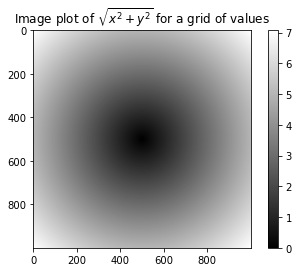

In [133]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

###  将条件逻辑表述为数组运算


In [134]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [135]:
list(zip(xarr,yarr,cond))

[(1.1, 2.1, True),
 (1.2, 2.2, False),
 (1.3, 2.3, True),
 (1.4, 2.4, True),
 (1.5, 2.5, False)]

假设根据cond的值选取xarr或yarr的值：当cond中的值为True时，选取xarr，否则从yarr选取。列表生成式写法如下：

In [136]:
result = [(x if c else y) for x,y,c in zip(xarr,yarr,cond)]

In [137]:
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [138]:
np.where(cond,xarr,yarr)

array([1.1, 2.2, 1.3, 1.4, 2.5])

上述写法存在几个问题：
1. 对大数组的处理速度不是很快，因为都是由纯Python完成
2. 无法用于多维数组。

`numpy.where`函数是三元表达式`x if condition els y`的矢量化版本。若使用`np.where`则更简洁：

In [139]:
result = np.where(cond, xarr, 0)
result

array([1.1, 0. , 1.3, 1.4, 0. ])

+ `np.where`的第二个和第三个参数不必是数组，都可以是标量。
+ `np.where`通常用于根据一个数组而产生一个新的数组。

假设有一个随机数组成的矩阵，将所有的正值替换为2，所有的负值替换为-2。则

In [140]:
arr18 = np.random.randn(4,4)
arr18

array([[-1.76823794, -0.46580114, -0.23786708, -0.01360233],
       [-0.14092718, -0.6943253 , -0.01915586,  1.60227727],
       [ 1.27614223, -0.00828688, -0.00599382, -0.02984351],
       [ 1.13702545, -0.97205246, -0.83528901, -0.37099064]])

In [141]:
np.where(arr18 > 0, 2, -2)

array([[-2, -2, -2, -2],
       [-2, -2, -2,  2],
       [ 2, -2, -2, -2],
       [ 2, -2, -2, -2]])

In [142]:
np.where(arr18 > 0, 2, arr18)

array([[-1.76823794, -0.46580114, -0.23786708, -0.01360233],
       [-0.14092718, -0.6943253 , -0.01915586,  2.        ],
       [ 2.        , -0.00828688, -0.00599382, -0.02984351],
       [ 2.        , -0.97205246, -0.83528901, -0.37099064]])

+ 传递给`np.where`的数组大小可以不相等，甚至是标量。
+ `np.where`可以嵌套,例如：`np.where(cond1 & cond2, 0, (np.where(cond1, 1, np.where(cond2, 2, 3)))`

### 数学和统计方法
+ 可以通过数组上的一组函数对整个数组或某个轴向的数据进行统计计算。
+ `sum`,`mean`以及标准差`std`等聚合计算既可以当作数组的实例方法调用，也可以当作顶级NumPy函数使用。

In [143]:
arr19 = np.random.randn(5, 4)
arr19

array([[-0.66558566, -1.50232418,  0.89846116, -0.46605357],
       [ 1.43382191, -0.17202125,  0.07156183, -1.4744154 ],
       [ 0.29877875,  1.6377962 , -0.1869674 , -0.88699451],
       [-0.00571209,  0.19997782, -0.58862138,  0.21666764],
       [ 0.98498652,  1.05985936, -0.39520682,  0.57168415]])

In [144]:
arr19.mean()

0.05148465348380438

In [145]:
np.mean(arr19)

0.05148465348380438

In [146]:
arr19.sum()

1.0296930696760875

+ `mean`和`sum`这类函数可以接受一个axis参数，用于计算该轴上的统计值。最终结果是一个少一维的数组。

In [147]:
arr19.mean(axis = 1)

array([-0.43387556, -0.03526323,  0.21565326, -0.04442201,  0.5553308 ])

In [148]:
arr19.mean(axis=0)

array([ 0.40925789,  0.24465759, -0.04015452, -0.40782234])

In [149]:
arr19.sum(axis=0)

array([ 2.04628943,  1.22328794, -0.20077261, -2.03911169])

+ 其它如`cumsum`和`cumprod`之类的方法则不聚合，而是产生一个由中间结果组成的数组。

In [150]:
arr20 = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr20
arr20.cumsum(axis=0)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [151]:
arr20.cumprod(axis = 1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

基本数组统计方法表。

| 方法           | 说明                                               |
| :--------------: |  :--------------:|
| sum            | 对数组中全部或某轴向的元素求和。零长度数组的sum为0 |
| mean           | 算术平均数                                         |
| std、var       | 分别为标准差和方差                                 |
| min、max       | 最小值和最大值                                     |
| argmin、argmax | 分别为最小、最大元素的索引                         |
| cumsum         | 所有元素的累计和                                   |
| cumprod        | 所有元素的累计积                                   |

###  用于布尔型数组的方法
在前述方法中，布尔值会被强制转换为1(`True`)和0(`False`)。因此`sum`经常被用于对布尔型数组中的True值计数。

In [152]:
arr21 = np.random.randn(100)
(arr21 > 0).sum()     # 正值的个数

60

+ 方法`any`和`all`对布尔型数组也非常有用：`any`用于测试数组中是否存在一个或多个`True`， 而`all`则检查数组中所有值是否都是`True`。
+ 这两个方法也可以用于非布尔型数组，所有非零元素都会被当作`True`。

In [153]:
bools = np.array([False, False, True, False])
bools.any()

True

In [154]:
bools.all()

False

In [155]:
data3 = np.array([1.1, 1.2, 0, 2, 3])
data3.any()

True

In [156]:
data3.all()

False

###  排序
跟Python内置的列表类型一样，NumPy数组也可以通过sort方法**就地进行排序**。

In [157]:
arr22 = np.random.randn(8)
arr22

array([ 0.88708502,  0.48861943,  0.05234188, -1.03305173, -2.16311146,
        0.60401972, -1.13866968, -0.20992638])

In [158]:
arr22.sort()

In [159]:
arr22

array([-2.16311146, -1.13866968, -1.03305173, -0.20992638,  0.05234188,
        0.48861943,  0.60401972,  0.88708502])

+ 多维数组可以在任何一个轴上进行排序，只需将轴编号作为参数传入`sort`即可：

In [160]:
arr23 = np.random.randn(5,3)
arr23

array([[ 0.04359297, -0.03397034, -0.7919427 ],
       [ 0.11195223,  1.84870969,  1.20956119],
       [ 0.8827819 ,  0.78337863, -0.02635881],
       [-1.28859166, -0.86290476, -0.61367477],
       [ 0.43460434, -0.6354756 , -0.79117999]])

In [161]:
sor= np.sort(arr23)
sor

array([[-0.7919427 , -0.03397034,  0.04359297],
       [ 0.11195223,  1.20956119,  1.84870969],
       [-0.02635881,  0.78337863,  0.8827819 ],
       [-1.28859166, -0.86290476, -0.61367477],
       [-0.79117999, -0.6354756 ,  0.43460434]])

In [162]:
arr23.sort(axis=1)

In [163]:
arr23

array([[-0.7919427 , -0.03397034,  0.04359297],
       [ 0.11195223,  1.20956119,  1.84870969],
       [-0.02635881,  0.78337863,  0.8827819 ],
       [-1.28859166, -0.86290476, -0.61367477],
       [-0.79117999, -0.6354756 ,  0.43460434]])

+ 顶级方法sort返回的是数组的已排序副本，而就地排序则会修改数组本身。
+ 计算数组分位数最简单的办法就是对数组进行排序，然后选取特定位置的值。

In [164]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))]    # 5%分位数

-1.6775376609909096

###  唯一化以及其他的一些集合逻辑
NumPy提供一些针对一维ndarray的基本集合运算。譬如，`np.unique`,找出数组中的唯一值并返回已排序的结果。

In [165]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [166]:
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [167]:
ints = np.array([3,3,3,2,2,1,1,4,4])
np.unique(ints)

array([1, 2, 3, 4])

In [168]:
sorted(set(names))

['Bob', 'Joe', 'Will']

+ 函数np.in1d用于测试一个数组中的值在另一个数组中的成员资格，返回一个布尔型数组。

In [169]:
values = np.array([6, 0, 0, 3, 2, 5, 6])

In [170]:
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

数组的集合运算函数表：

|方法|说明  |
|:--:|:--:|
| unique(x) |计算x中的唯一元素，并返回有序结果  |
| intersect1d(x,y) |计算x和y的公共元素，并返回有序结果  |
| union1d(x,y) |计算x和y的并集，并返回有序结果  |
| in1d(x,y) |得到一个表示“x的元素是否包含于y”的布尔型数组  |
| setdiff1d(x,y) |集合的差，即元素在x中且不在y中  |
| setxor1d(x,y) |集合的对称差，即存在于一个数组中但不同时存在于两个数组中的元素  |



# 用于数组的文件输入输出
NumPy能够读写磁盘上的文本数据或二进制数据。后面讲到的pandas用于将表格型数据读取到内存中。

## 将数组以二进制格式保存到磁盘
`np.save` 和 `np.load`是读写磁盘数组的两个主要函数。默认情况下，数组是以未压缩的原始二进制格式保存在扩展名为 *.npy* 的文件中。

In [171]:
arr24 = np.arange(10)
np.save('arr24', arr24)

In [172]:
ls

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [173]:
np.load('arr24.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

+ 通过`np.savez`可以将多个数组保存到一个压缩文件中，将数组以关键字参数的形式传入即可：
+ 加载 .npz 文件时，会得到一个类似字典的对象。

In [174]:
arr25 = np.random.randn(3, 4)

In [175]:
np.savez('arr_archived.npz', a = arr24, b = arr25)

In [176]:
arch = np.load('arr_archived.npz')
arch['b']

array([[-1.68918637,  0.23478903, -1.9052124 ,  0.8903198 ],
       [ 1.77274468,  0.36601496,  0.75538278, -1.08087406],
       [ 0.84124541,  1.62236687, -0.47932113,  0.95101156]])

In [177]:
arch['a']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## 存取文本文件
Python也有文件的读写函数，但并不太易用。因此本课程主要介绍Pandas中的`read_csv`和`read_table`函数，有时也用NumPy的`np.loadtxt`将数据加载到NumPy的数组中。

In [178]:
arr = np.loadtxt('arr_csv.csv', delimiter=',')

In [179]:
arr

array([[0.21588889, 0.86253552, 0.2659228 ],
       [0.38891274, 0.39542911, 0.52475854],
       [0.55477862, 0.1809702 , 0.7752453 ],
       [0.10663222, 0.69513153, 0.06849945],
       [0.57416129, 0.61863014, 0.27521237],
       [0.63571405, 0.73961201, 0.00164165]])

In [180]:
np.savetxt(delimiter='\t',fname='newsave.csv', X=arr)

**更多文件的读写，尤其是表格型数据，采用pandas方法。**

# 常用子库
## 线性代数
线性代数（矩阵乘法、矩阵分解、行列式等）。NumPy提供了一个用于矩阵乘法的 **dot** 函数，既是一个数组的方法，也是numpy命名空间的一个函数。

In [181]:
x = np.array([[1, 2, 3], [4, 5, 6]])
y = np.array([[6, 23.], [-1, 7], [8, 9]])

In [182]:
x

array([[1, 2, 3],
       [4, 5, 6]])

In [183]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [184]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [185]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [186]:
np.dot(x, np.ones(3))

array([ 6., 15.])

+ `numpy.linalg`中有一组标准的矩阵分解运算，譬如求逆、行列式等。

In [187]:
X = np.random.randn(5,5)

In [188]:
mat = X.T.dot(X)

In [189]:
mat

array([[ 5.00705475,  5.0033893 , -0.94561309, -0.24618313, -1.409571  ],
       [ 5.0033893 ,  7.31228728, -1.2069514 ,  0.87232078, -4.16606234],
       [-0.94561309, -1.2069514 ,  1.07095184, -0.25282339,  0.92253513],
       [-0.24618313,  0.87232078, -0.25282339,  2.41432723, -1.2376462 ],
       [-1.409571  , -4.16606234,  0.92253513, -1.2376462 ,  5.39231262]])

In [190]:
np.linalg.inv(mat)

array([[ 1.40177036, -1.28520011,  0.40079466,  0.33201033, -0.61887449],
       [-1.28520011,  1.44004576, -0.22522639, -0.29135256,  0.74827403],
       [ 0.40079466, -0.22522639,  1.28799357,  0.12315823, -0.26132603],
       [ 0.33201033, -0.29135256,  0.12315823,  0.54912086, -0.033344  ],
       [-0.61887449,  0.74827403, -0.26132603, -0.033344  ,  0.63883965]])

In [191]:
mat.dot(np.linalg.inv(mat))

array([[ 1.00000000e+00,  1.04117485e-16,  2.29426334e-16,
        -2.43434866e-16,  1.56243649e-16],
       [-7.38513859e-16,  1.00000000e+00,  4.13320761e-16,
        -8.49316324e-17,  2.70049759e-17],
       [ 2.47238634e-16,  1.52698748e-16,  1.00000000e+00,
         3.28243652e-17, -6.25236793e-18],
       [ 1.58056341e-16, -2.04681312e-16,  6.71253292e-17,
         1.00000000e+00,  3.40768989e-17],
       [ 5.60230787e-16,  6.50268102e-16,  1.17722259e-16,
         1.31705767e-16,  1.00000000e+00]])

In [192]:
from numpy.linalg import inv, qr
inv(mat)

array([[ 1.40177036, -1.28520011,  0.40079466,  0.33201033, -0.61887449],
       [-1.28520011,  1.44004576, -0.22522639, -0.29135256,  0.74827403],
       [ 0.40079466, -0.22522639,  1.28799357,  0.12315823, -0.26132603],
       [ 0.33201033, -0.29135256,  0.12315823,  0.54912086, -0.033344  ],
       [-0.61887449,  0.74827403, -0.26132603, -0.033344  ,  0.63883965]])

常用的`numpy.linalg`函数

| 函数  | 说明  |
|:--:|:--:|
|diag  | 以一维数组形式返回方阵的对角线元素；或将一维数组转换为方阵（非对角线元素为0） |
|dot|矩阵乘法|
|trace|计算对角线元素之和|
|det|计算矩阵行列式|
|eig|计算方阵的特征值和特征向量|
|inv|计算方阵的逆|
|solve|求解线性方程组$Ax=b$|
|lstsq|计算$Ax=b$的最小二乘解|

## 随机数生成
### Python 的random 模块可以用于产生随机数

In [193]:
import random
random.random()

0.0184942328766452

In [194]:
random.uniform(1, 5)

2.637517665443273

In [195]:
random.choice([1, 3, 5, 7, 9])

1

In [196]:
seq = [2, 4, 6, 8, 10]
random.shuffle(seq)
seq

[4, 6, 8, 10, 2]

In [197]:
samp = random.sample(seq, 3)
samp

[2, 10, 6]

Python的random函数

| 函数    | 说明                                  |
| ------- | ------------------------------------- |
| random  | [0,1)均匀分布随机数                   |
| randint | 给定区间的整数                        |
| uniform | 给定区间均匀分布随机数                |
| shuffle | 将给定序列随机打乱                    |
| choice  | 从非空序列中返回一个随机元素          |
| sample  | 从总体序列或集合中抽取k个，无重复抽样 |

### numpy.random

+ `numpy.random`模块对Python内置的random进行了补充，增加了一些高效生产多种概率分布的样本值的函数。

In [198]:
samples = np.random.normal(size=(4, 4))
samples

array([[ 3.8066006 , -1.00204638, -0.50822004,  1.549448  ],
       [ 0.24729845,  0.30740105,  3.0356131 ,  1.06700661],
       [-1.76566074,  0.32841167, -0.92681757,  0.09338429],
       [-1.03042006,  0.72905386,  1.39444049, -0.15028843]])

In [199]:
N = 1000000

In [222]:
%time test = [i**2 for i in range(N)]

Wall time: 672 ms


In [223]:
import random

In [202]:
%timeit sample1 = [random.random() for _ in range(N)]

242 ms ± 17.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [203]:
%timeit sample2 = np.random.random(N)

16.4 ms ± 504 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


部分`numpy.random`函数

| 函数        | 说明                                           |
| ----------- | ---------------------------------------------- |
| seed        | 确定随机数生成器的种子                         |
| permutation | 返回一个序列的随机排列或返回一个随机排列的范围 |
| shuffle     | 对一个序列就地随机排列                         |
| rand        | 产生均匀分布的样本值                           |
| randint     | 从给定的上下限范围内随机生成整数               |
| randn       | 标准正态分布抽样值                             |
| normal      | 正态分布样本值                                 |
| chisquare   | 卡方分布样本值                                 |
| uniform     | [0,1)均匀分布样本值                            |
| choice      | 从从一维数组中抽样                             |

## 范例：随机漫步
从0开始，步长1和-1出现的概率相等，实现1000步的随机漫步。

In [5]:
# 步数
nSteps = 1000
draws = np.random.randint(0, 2, size=nSteps) # 1000个0或1的随机数

walk = draws.cumsum() # 累积求和，即当前位置

In [14]:
draws=np.where(draws,draws,-1)

In [15]:
walk = draws.cumsum() # 累积求和，即当前位置
walk

array([ 1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  3,  2,  3,  2,  3,
        4,  5,  4,  3,  2,  3,  2,  1,  0, -1, -2, -3, -2, -1,  0,  1,  2,
        3,  4,  3,  4,  3,  4,  5,  6,  7,  8,  9,  8,  9, 10,  9, 10,  9,
       10,  9, 10, 11, 10,  9,  8,  7,  8,  7,  8,  7,  6,  7,  8,  9,  8,
        7,  6,  5,  4,  5,  4,  5,  4,  5,  4,  3,  2,  3,  2,  3,  2,  3,
        2,  3,  4,  5,  6,  5,  6,  7,  8,  9,  8,  7,  6,  7,  6,  5,  6,
        5,  6,  5,  6,  5,  4,  5,  6,  7,  8,  7,  6,  5,  6,  5,  6,  7,
        8,  9, 10, 11, 10,  9, 10,  9, 10, 11, 12, 13, 12, 11, 12, 13, 12,
       11, 12, 11, 10, 11, 12, 13, 14, 13, 12, 13, 14, 15, 16, 17, 16, 17,
       18, 17, 18, 17, 18, 19, 20, 21, 22, 23, 22, 21, 20, 19, 20, 19, 18,
       17, 16, 15, 14, 13, 14, 15, 16, 17, 16, 17, 18, 19, 18, 17, 16, 17,
       18, 19, 20, 19, 20, 19, 18, 17, 16, 17, 16, 15, 14, 15, 16, 15, 16,
       15, 16, 15, 14, 15, 14, 15, 14, 15, 16, 15, 16, 17, 16, 15, 16, 15,
       16, 17, 18, 17, 18

In [16]:
# 绘制图
from matplotlib import pyplot as plt

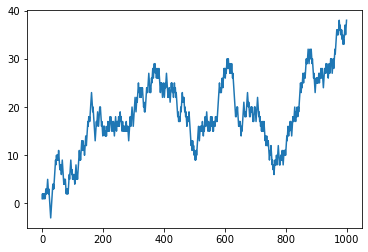

In [17]:
fig = plt.figure()
plt.plot(walk)
plt.show()